In [2]:
#importer les librairies pours utiliser un CNN
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Input
import keras.layers as layers
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

In [3]:
#importer les données de training et test
trainData = pd.read_csv('Data/train.csv')
trainLabels = pd.read_csv('Data/train_result.csv')
testData = pd.read_csv('Data/test.csv')

In [4]:
#Mettre les points en bas de 0 à 0 et enlver les NaN
trainData[trainData < 0] = 0
trainData = trainData.dropna(axis=1)

testData[testData < 0] = 0
testData = testData[trainData.columns]

In [5]:
#Reformer les donnees pour avoir une matrice de 4d pour que l'entree dans le CNN soit en 3d
newTrainData = np.array(trainData).reshape(50000,28,56,1)

In [6]:
#Créer les données de training et validation
trainX,validX,trainY,validY = train_test_split(newTrainData,trainLabels,test_size = 0.2, random_state = 1)

10

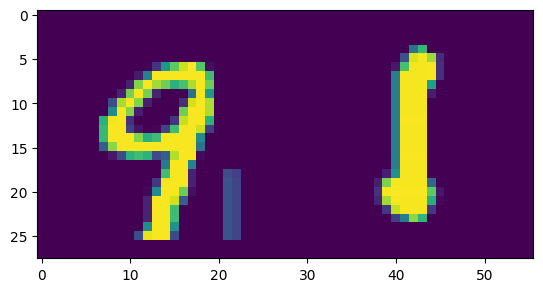

In [7]:
#Visualiser
import matplotlib.pyplot as plt
plt.imshow(trainX[15])
trainY.iloc[15,1]

In [8]:
#Transformer les labels en one hot vector
labels = trainLabels.iloc[:,1].unique().size
trainYOH = keras.utils.to_categorical(trainY['Class'], labels)
validYOH = keras.utils.to_categorical(validY['Class'], labels)

In [25]:
#Batir le CNN
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,56,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=19, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [29]:
#Hyperparametre d'entrainement
batchSize = 128
epochs = 24

In [27]:
#Entrainer le model et voir sa precision sur le validation set
model.fit(trainX, trainYOH,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(validX, validYOH))
#score = model.evaluate(validX, validYOH, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/100
313/313 [==============================] - 8s 26ms/step - loss: 2.2591 - accuracy: 0.2439 - val_loss: 1.5565 - val_accuracy: 0.4918
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 1.1028 - accuracy: 0.6504 - val_loss: 0.7816 - val_accuracy: 0.7595
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6307 - accuracy: 0.8056 - val_loss: 0.5593 - val_accuracy: 0.8299
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.4491 - accuracy: 0.8648 - val_loss: 0.4442 - val_accuracy: 0.8610
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.3544 - accuracy: 0.8927 - val_loss: 0.4013 - val_accuracy: 0.8762
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.3002 - accuracy: 0.9092 - val_loss: 0.3650 - val_accuracy: 0.8887
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.2596 - accuracy: 0.9197 - val_loss: 0.3413 - val_accuracy:

In [31]:
model.evaluate(validX, validYOH, verbose=0)

[0.5221875309944153, 0.945900022983551]

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'Same', 
                 activation ='relu', input_shape=(28,56,1)))
model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.125))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.125))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(19, activation = "softmax"))

In [31]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [32]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [33]:
#Entrainer le model et voir sa precision sur le validation set
history = model.fit(trainX, trainYOH,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(validX, validYOH),
             callbacks=[learning_rate_reduction])
#score = model.evaluate(validX, validYOH, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/24
313/313 [==============================] - 339s 1s/step - loss: 2.4645 - accuracy: 0.1734 - val_loss: 1.4985 - val_accuracy: 0.4689 - lr: 5.0000e-04
Epoch 2/24
313/313 [==============================] - 652s 2s/step - loss: 0.9196 - accuracy: 0.6936 - val_loss: 0.2705 - val_accuracy: 0.9240 - lr: 5.0000e-04
Epoch 3/24
313/313 [==============================] - 859s 3s/step - loss: 0.3156 - accuracy: 0.9120 - val_loss: 0.1190 - val_accuracy: 0.9692 - lr: 5.0000e-04
Epoch 4/24
313/313 [==============================] - 825s 3s/step - loss: 0.1804 - accuracy: 0.9520 - val_loss: 0.1075 - val_accuracy: 0.9742 - lr: 5.0000e-04
Epoch 5/24
313/313 [==============================] - 814s 3s/step - loss: 0.1302 - accuracy: 0.9667 - val_loss: 0.0915 - val_accuracy: 0.9760 - lr: 5.0000e-04
Epoch 6/24
313/313 [==============================] - 781s 2s/step - loss: 0.0944 - accuracy: 0.9751 - val_loss: 0.0575 - val_accuracy: 0.9860 - lr: 5.0000e-04
Epoch 7/24
313/313 [====================

In [34]:
#Predire les donnees de test
newTestData = np.array(testData).reshape(10000,28,56,1)
predictions = model.predict(newTestData)

313/313 [==============================] - 14s 43ms/step


In [35]:
#Prendre le argmax de chaque rangee
predictionsVal = np.argmax(predictions,axis=1)

In [36]:
#Transformer et exporter les prédictions
predict = pd.DataFrame([range(10000),predictionsVal], index = ['Index','Class']).transpose()

predict.to_csv('predictions_CNN3.csv',index=False)

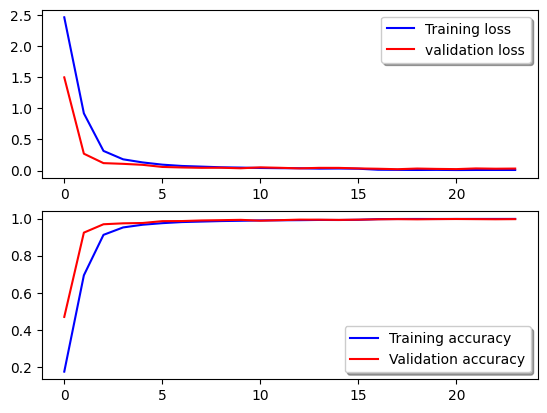

In [37]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

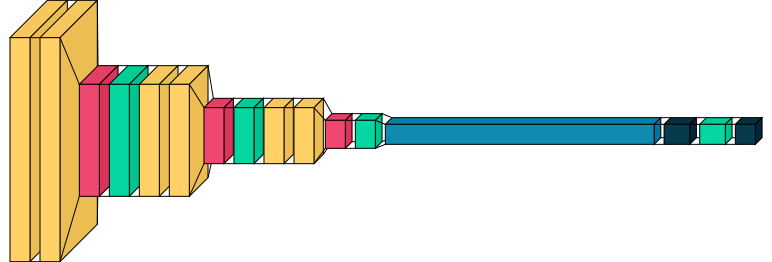

In [38]:
import visualkeras
visualkeras.layered_view(model)

313/313 [==============================] - 16s 53ms/step


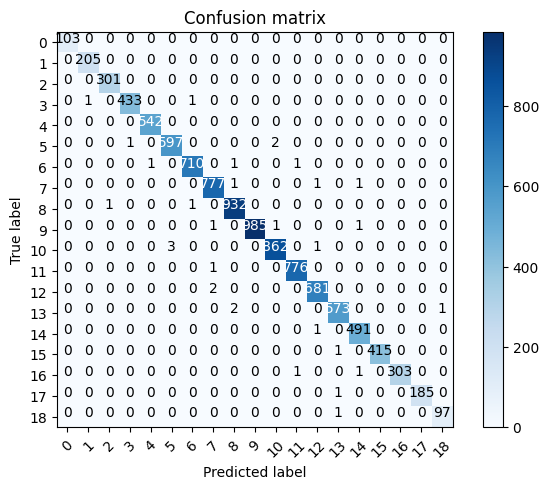

In [42]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(validX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(validY['Class'], Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(19)) 